# PIL

In [ ]:
from PIL import Image
from PIL import ImageDraw
from pathlib import Path
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

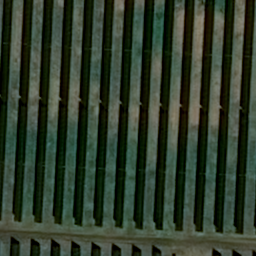

In [ ]:
im = Image.open("assets/example.png")
im

This will show image in a separate window, title doesn't work, see [here](https://github.com/python-pillow/Pillow/issues/5739).

In [ ]:
im.show('pera')

This can show image in Jupyter with title but not true colors:

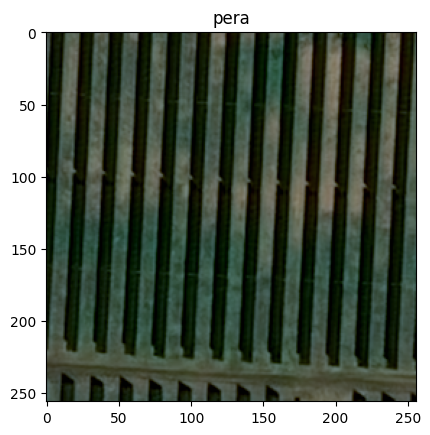

In [ ]:
plt.imshow(im)
plt.title('pera')
plt.show()

In jupyter one can use only:

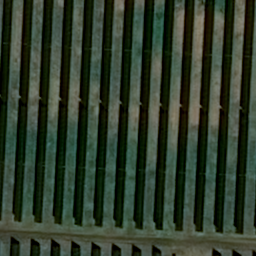

In [ ]:
im  # display(im)

To create new image:

In [ ]:
width, height = 256, 256
mask = Image.new('L', (width, height), 0)

Example to draw a polygon:

In [ ]:

polygon = [(4, 1), (1, 54), (1, 222), (13, 1)]
ImageDraw.Draw(mask).polygon(polygon, outline=255, fill=255)

To load image from png, show bands (i.e. channels):

In [ ]:
im = Image.open('assets/example.png')
print(im.getbands())

('R', 'G', 'B')


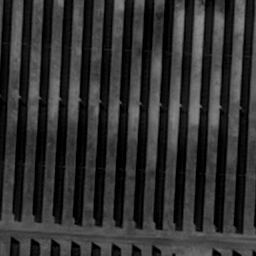

In [ ]:
im.getchannel('R')

To convert to RGB (from RGBA for example):

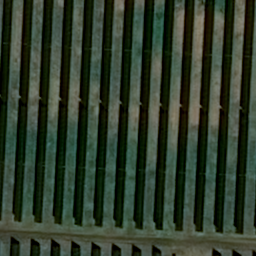

In [ ]:
im.convert('RGB')

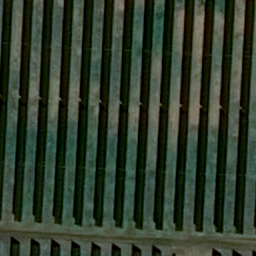

In [ ]:
im.convert("RGBA")

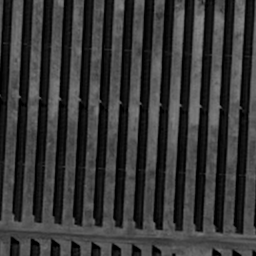

In [ ]:
im.convert('L')

To convert to tensor:

In [ ]:
tensorizer = ToTensor()
im_tensor = tensorizer(im)
print(im_tensor.shape)
im_tensor[:, :3, :3]

torch.Size([3, 256, 256])


tensor([[[0.3020, 0.2902, 0.2706],
         [0.2941, 0.2824, 0.2667],
         [0.2824, 0.2706, 0.2627]],

        [[0.3333, 0.3216, 0.3059],
         [0.3294, 0.3176, 0.3059],
         [0.3137, 0.3059, 0.3020]],

        [[0.3059, 0.2980, 0.2863],
         [0.2941, 0.2902, 0.2863],
         [0.2745, 0.2745, 0.2784]]])

In [ ]:
def save_image(im: Image, filepath: Path, overwrite: bool = False):
    if filepath.exists() and not overwrite:
        return
    im.save(filepath, "PNG")